# Traffic Sign Recognition: Image Processing and Feature Detection

**FA-1 Assignment**

Name: Ritesh Atul Parhate<br>
PRN: 121B1B172<br>
Div: C<br>
Subject: Computer Vision<br>
Topic: Traffic Sign Recognition

For this assignment of Traffic Sign Recognition, the followiing steps will be followed:<br>
1. Loading and Displaying Images
2. Noise Reduction
3. Edge Detection
4. Corner Detection
5. Feature Detection

We first begin by importing the necessary libraries

In [172]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Loading and Displaying Images

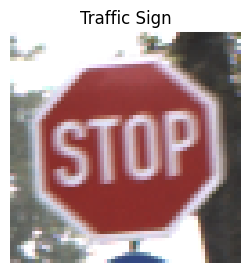

In [173]:
images_csv_path = '/kaggle/input/gtsrb-german-traffic-sign/Train.csv'
images_dir = '/kaggle/input/gtsrb-german-traffic-sign/Train'

data = pd.read_csv(images_csv_path)

def load_image(file_path, size=(64, 64)):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    return img

sample_img_path = '/kaggle/input/gtsrb-german-traffic-sign/Train/14/00014_00000_00024.png'
sample_img = load_image(sample_img_path)

plt.figure(figsize=(3, 3))
plt.imshow(sample_img)
plt.title('Traffic Sign')
plt.axis('off')
plt.show()

# 2. Noise Reduction
We apply *Gaussian* and *Median* filters to the image to smooth and reduce noise.<br>
* In traffic sign recognition, Gaussian blur helps in reducing high-frequency noise while preserving the edges.
* Median filter preserves edges while reducing random noise, which is required in real-world images like traffic signs.

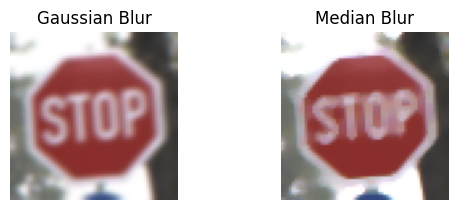

In [174]:
def apply_noise_reduction(img):
    gaussian = cv2.GaussianBlur(img, (5, 5), 0)
    median = cv2.medianBlur(img, 5)
    return gaussian, median

gaussian, median = apply_noise_reduction(sample_img)

plt.subplot(2, 2, 1)
plt.imshow(gaussian)
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(median)
plt.title('Median Blur')
plt.axis('off')

plt.show()

Combining the results from Gaussian and Median filters to create a composite image.

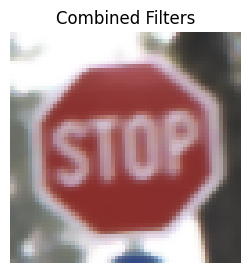

In [175]:
def combine_filters(gaussian, median, alpha=0.5, beta=0.5):
    combined = cv2.addWeighted(gaussian, alpha, median, beta, 0)
    return combined

combined_filter_img = combine_filters(gaussian, median)
plt.figure(figsize=(3, 3))
plt.imshow(combined_filter_img)
plt.title('Combined Filters')
plt.axis('off')
plt.show()

# 3. Edge Detection
Applying *Sobel* and *Canny* edge detection algorithms to highlight the edges in the image.<br>
* Sobel edge detection helps identify the structure of traffic signs by detecting the horizontal and vertical edges separately.
* Canny provides a more refined and accurate edge map.

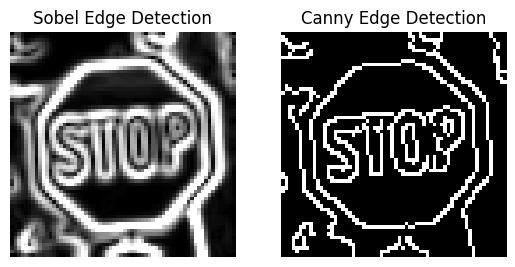

In [176]:
def apply_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Sobel Edge Detection
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobel_x, sobel_y)
    sobel = cv2.convertScaleAbs(sobel)
    
    # Canny Edge Detection
    canny = cv2.Canny(gray, 100, 200)
    
    return sobel, canny

sobel, canny = apply_edge_detection(combined_filter_img)

plt.subplot(1, 2, 1)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

Combining Sobel and Canny allows us to capture both sharp and soft edges, which improves feature detection.

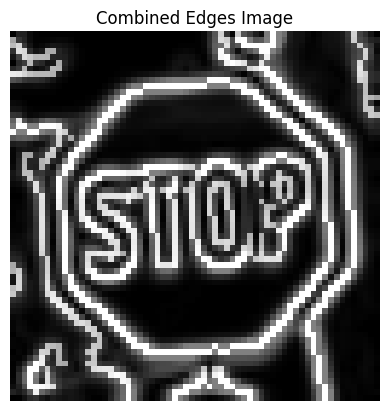

In [177]:
def combine_edge_detection(sobel, canny, alpha=0.5, beta=0.5):
    combined = cv2.addWeighted(sobel, alpha, canny, beta, 0)
    return combined

combined_edges_img = combine_edge_detection(sobel, canny)

plt.subplot(1, 1, 1)
plt.imshow(combined_edges_img, cmap='gray')
plt.title('Combined Edges Image')
plt.axis('off')

plt.show()

# 4. Corner Detection
Applying *Harris* and *FAST* corner detection methods to find corners in the edge-detected images.<br>
* Harris detects the corners of traffic signs, which are often prominent and contain useful information for recognition.
* FAST is efficient and effective, particularly for real-time applications, like traffic sign detection.

In [178]:
def apply_corner_detection(edge_img):
    # Harris Corner Detection
    harris = cv2.cornerHarris(edge_img, blockSize=2, ksize=3, k=0.04)
    harris = cv2.dilate(harris, None)
    harris_corners = np.zeros_like(edge_img)
    harris_corners[harris > 0.01 * harris.max()] = 255
    
    # FAST Corner Detection
    fast = cv2.FastFeatureDetector_create()
    keypoints = fast.detect(edge_img, None)
    fast_corners = cv2.drawKeypoints(edge_img, keypoints, None, color=(255, 0, 0))
    
    return harris_corners, fast_corners

harris_sobel_corners, fast_sobel_corners = apply_corner_detection(sobel)
harris_canny_corners, fast_canny_corners = apply_corner_detection(canny)
harris_combined_corners, fast_combined_corners = apply_corner_detection(combined_edges_img)

Harris corner detection results

(-0.5, 63.5, 63.5, -0.5)

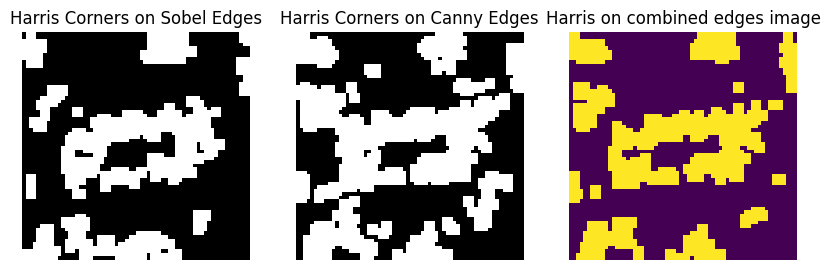

In [179]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(harris_sobel_corners, cmap='gray')
plt.title('Harris Corners on Sobel Edges')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(harris_canny_corners, cmap='gray')
plt.title('Harris Corners on Canny Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(harris_combined_corners)
plt.title('Harris on combined edges image')
plt.axis('off')

FAST corner detection

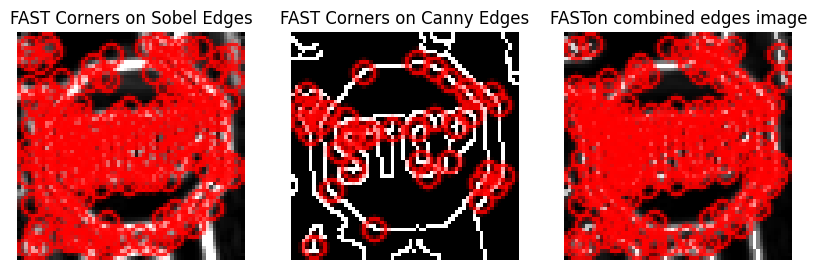

In [180]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(fast_sobel_corners)
plt.title('FAST Corners on Sobel Edges')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(fast_canny_corners)
plt.title('FAST Corners on Canny Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(fast_combined_corners)
plt.title('FASTon combined edges image')
plt.axis('off')

plt.show()

# 5. Feature Detection
Using *SIFT* (Scale-Invariant Feature Transform) to detect and visualize keypoints in the images.

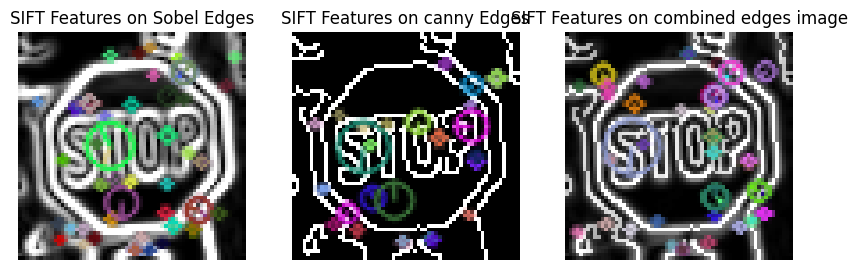

In [181]:
def apply_feature_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # SIFT Feature Detection
    sift = cv2.SIFT_create()
    kp_sift, des_sift = sift.detectAndCompute(gray, None)
    sift_img = cv2.drawKeypoints(gray, kp_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    return sift_img

sift_sobel = apply_feature_detection(cv2.cvtColor(sobel, cv2.COLOR_GRAY2RGB))
sift_canny = apply_feature_detection(cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB))
sift = apply_feature_detection(cv2.cvtColor(combined_edges_img, cv2.COLOR_GRAY2RGB))

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(sift_sobel)
plt.title('SIFT Features on Sobel Edges')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sift_canny)
plt.title('SIFT Features on canny Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sift)
plt.title('SIFT Features on combined edges image')
plt.axis('off')

plt.show()
